In [185]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [186]:
x0 = 20
y0 = 20
alpha1 = 1
beta1 = 0.1
alpha2 = 0.5
beta2 = 0.02
t0 = 0
tmax = 80
n = 1000
h = (tmax - t0) / n

def dx(x, y):
    return x * (alpha1 - beta1 * y)

def dy(x, y):
    return y * (-alpha2 + beta2 * x)

def calc_H(x, y):
    if x <= 0 or y <= 0:
        return np.nan
    return beta2 * x + beta1 * y - alpha2 * np.log(x) - alpha1 * np.log(y)

def init_vars():
    nsteps = int((tmax - t0) / h)
    t = np.linspace(t0, tmax, nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    y = np.zeros(nsteps + 1)
    y[0] = y0
    H = np.zeros(nsteps + 1)
    H[0] = calc_H(x0, y0)
    return t, x, y, H

In [187]:
def euler_explicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] + h * x[k] * (alpha1 - beta1 * y[k])
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * x[k])
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def euler_implicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] / (1 + h * (-alpha1 + beta1 * y[k]))
        y[k + 1] = y[k] / (1 + h * (alpha2 - beta2 * x[k]))
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def euler_half_explicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] / (1 + h * (-alpha1 + beta1 * y[k]))
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * x[k])
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def runge_kutta_4():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        kx1 = dx(x[k], y[k])
        kx2 = dx(x[k] + h / 2, y[k] + h * kx1 / 2)
        kx3 = dx(x[k] + h / 2, y[k] + h * kx2 / 2)
        kx4 = dx(x[k] + h, y[k] + h * kx3)
        x[k + 1] = x[k] + (h / 6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

        ky1 = dy(x[k], y[k])
        ky2 = dy(x[k] + h / 2, y[k] + h * ky1 / 2)
        ky3 = dy(x[k] + h / 2, y[k] + h * ky2 / 2)
        ky4 = dy(x[k] + h, y[k] + h * ky3)
        y[k + 1] = y[k] + (h / 6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

In [188]:
def plot(function, label_x, label_y, color=None):
    t_vec, y_vec, x_vec, _ = function()
    plt.plot(t_vec, x_vec, label=label_x, color=color)
    plt.plot(t_vec, y_vec, label=label_y, color=color)


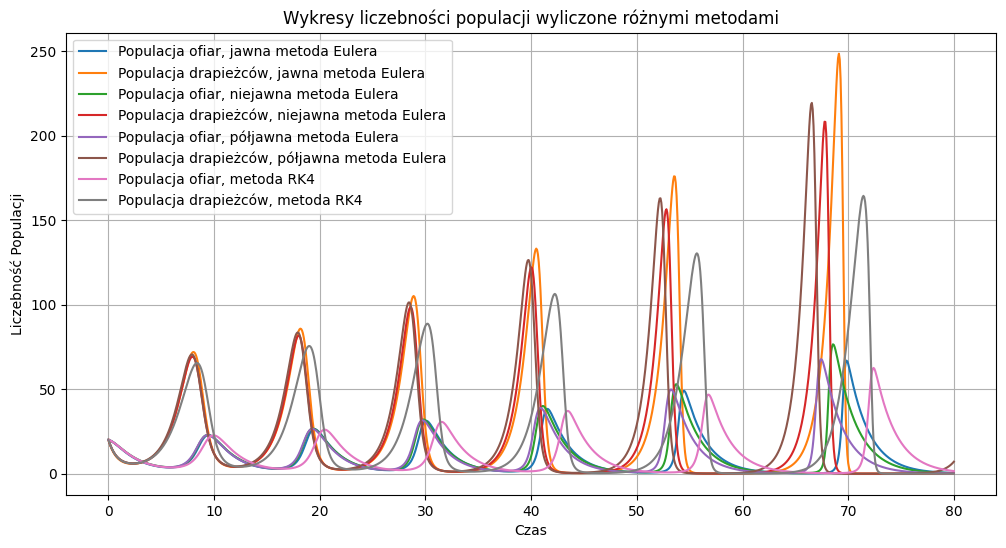

In [189]:
plt.figure(figsize=(12, 6))
plt.title("Wykresy liczebności populacji wyliczone różnymi metodami")
plot(euler_explicit, "Populacja ofiar, jawna metoda Eulera", "Populacja drapieżców, jawna metoda Eulera")
plot(euler_implicit, "Populacja ofiar, niejawna metoda Eulera", "Populacja drapieżców, niejawna metoda Eulera")
plot(euler_half_explicit, "Populacja ofiar, półjawna metoda Eulera", "Populacja drapieżców, półjawna metoda Eulera")
plot(runge_kutta_4, "Populacja ofiar, metoda RK4", "Populacja drapieżców, metoda RK4")
plt.xlabel('Czas')
plt.ylabel('Liczebność Populacji')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
def plot_phase(function, label, color=None):
    _, y_vec, x_vec, _ = function()
    plt.plot(x_vec, y_vec, label=label, color=color)

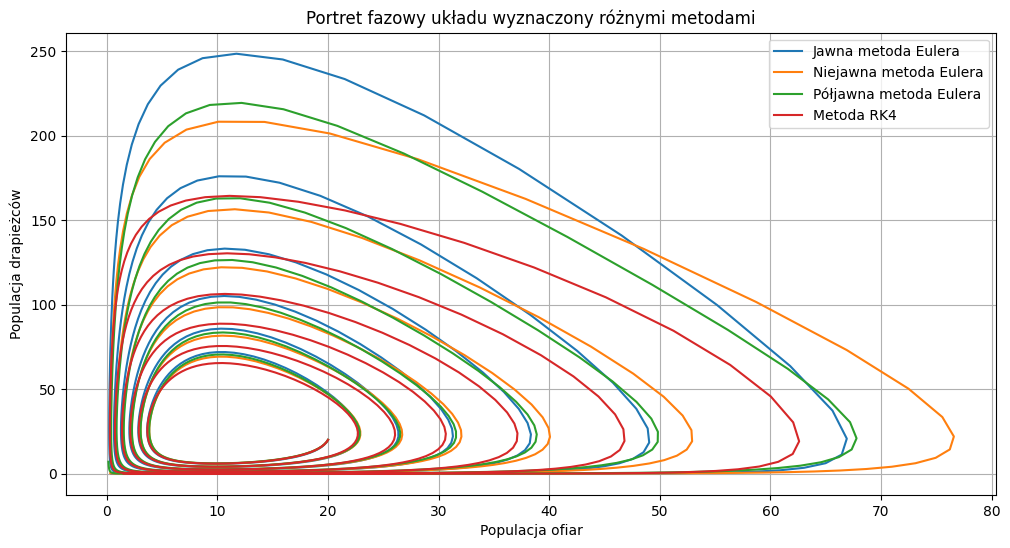

In [191]:
plt.figure(figsize=(12, 6))
plt.title("Portret fazowy układu wyznaczony różnymi metodami")
plot_phase(euler_explicit, "Jawna metoda Eulera")
plot_phase(euler_implicit, "Niejawna metoda Eulera")
plot_phase(euler_half_explicit, "Półjawna metoda Eulera")
plot_phase(runge_kutta_4, "Metoda RK4")
plt.xlabel('Populacja ofiar')
plt.ylabel('Populacja drapieżców')
plt.legend()
plt.grid(True)
plt.show()

(x,y)=(0,0) lub (x,y)=(alpha2/beta2,alpha1/beta1)

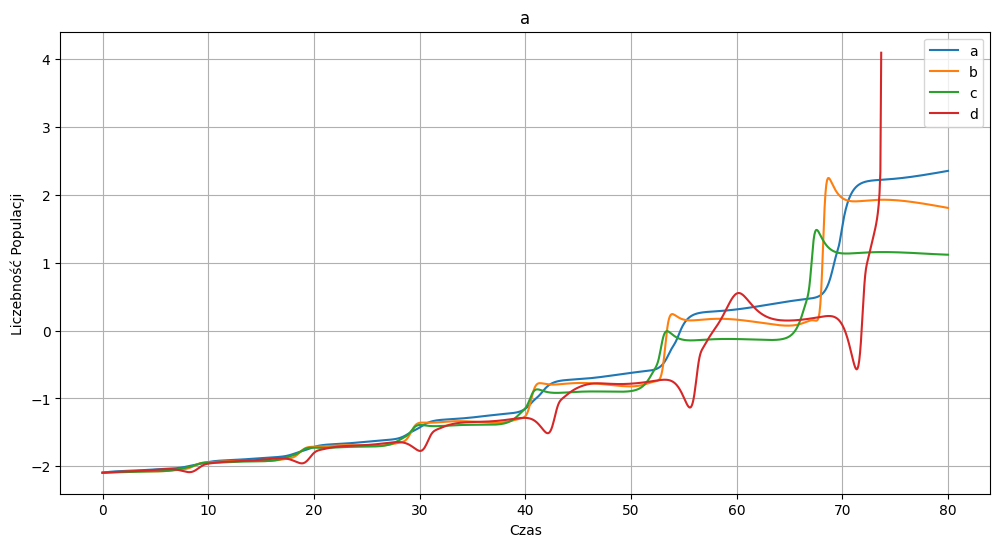

In [192]:
t_vec, _, _, H_euler_explicit = euler_explicit()
H_euler_implicit = euler_implicit()[3]
H_euler_half_explicit = euler_half_explicit()[3]
H_runge_kutta_4 = runge_kutta_4()[3]

plt.figure(figsize=(12, 6))
plt.title("a")
plt.plot(t_vec, H_euler_explicit, label="a")
plt.plot(t_vec, H_euler_implicit, label="b")
plt.plot(t_vec, H_euler_half_explicit, label="c")
plt.plot(t_vec, H_runge_kutta_4, label="d")
plt.xlabel('Czas')
plt.ylabel('Liczebność Populacji')
plt.legend()
plt.grid(True)
plt.show()

In [193]:
column_names = ['Year', 'Lynx', 'Hare']

df = pd.read_csv(
    "LynxHare.txt",
    sep='\s+',
    header=None,
    names=column_names
)

year = np.array(df['Year'])
lynx = np.array(df['Lynx'])
hare = np.array(df['Hare'])

In [194]:

nsteps = year[-1] - year[0]
t = np.arange(year[0], year[-1] + 1)
lynx_sim_init = np.zeros(nsteps + 1)
lynx_sim_init[0] = lynx[0]
hare_sim_init = np.zeros(nsteps + 1)
hare_sim_init[0] = hare[0]

def euler_half_implicit_lynx_hare(lynx_sim, hare_sim, a1, b1, a2, b2):
    for k in range(len(t) - 1):
        lynx_sim[k + 1] = lynx_sim[k] / (1 + h * (-a1 + b1 * hare_sim[k]))
        hare_sim[k + 1] = hare_sim[k] + h * hare_sim[k] * (-a2 + b2 * lynx_sim[k])
    return lynx_sim, hare_sim

def L1(theta):
    a1, b1, a2, b2 = theta
    if any(theta < 0):
        return np.inf
    lynx_sim, hare_sim = euler_half_implicit_lynx_hare(
        np.copy(lynx_sim_init), np.copy(hare_sim_init), a1, b1, a2, b2)
    
    rss = np.sum((lynx - lynx_sim)**2) + \
          np.sum((hare - hare_sim)**2)
    return rss

def L2(theta):
    a1, b1, a2, b2 = theta
    if any(theta < 0):
        return np.inf
    lynx_sim, hare_sim = euler_half_implicit_lynx_hare(
        np.copy(lynx_sim_init), np.copy(hare_sim_init), a1, b1, a2, b2)
    
    if any(lynx_sim <= 0) or any(hare_sim <= 0):
        return np.inf
    
    rss = -np.sum(lynx * np.log(lynx_sim)) - \
            np.sum(hare * np.log(hare_sim)) + \
            np.sum(lynx_sim) + np.sum(hare_sim)
    
    return rss

x0 = [1, 0.1, 0.5, 0.02]

In [195]:
result1 = minimize(
    L1,
    x0,
    method='Nelder-Mead',
    options={'disp': True, 'maxiter': 10000, 'fatol': 1e-6}
)
print(result1)

Optimization terminated successfully.
         Current function value: 166139.795336
         Iterations: 274
         Function evaluations: 471
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 166139.79533592105
             x: [ 3.851e+00  1.144e-01  1.887e-11  7.791e-04]
           nit: 274
          nfev: 471
 final_simplex: (array([[ 3.851e+00,  1.144e-01,  1.887e-11,  7.791e-04],
                       [ 3.851e+00,  1.144e-01,  4.361e-11,  7.791e-04],
                       ...,
                       [ 3.851e+00,  1.144e-01,  5.599e-11,  7.791e-04],
                       [ 3.851e+00,  1.144e-01,  6.293e-11,  7.791e-04]]), array([ 1.661e+05,  1.661e+05,  1.661e+05,  1.661e+05,
                        1.661e+05]))


In [196]:
result2 = minimize(
    L2,
    x0,
    method='Nelder-Mead',
    options={'disp': True, 'maxiter': 10000, 'fatol': 1e-6}
)
print(result2)

Optimization terminated successfully.
         Current function value: -17448.452499
         Iterations: 225
         Function evaluations: 404
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -17448.45249922933
             x: [ 3.536e+00  1.041e-01  3.209e-10  7.992e-04]
           nit: 225
          nfev: 404
 final_simplex: (array([[ 3.536e+00,  1.041e-01,  3.209e-10,  7.992e-04],
                       [ 3.536e+00,  1.041e-01,  4.245e-10,  7.992e-04],
                       ...,
                       [ 3.536e+00,  1.041e-01,  1.192e-09,  7.992e-04],
                       [ 3.536e+00,  1.041e-01,  2.215e-09,  7.992e-04]]), array([-1.745e+04, -1.745e+04, -1.745e+04, -1.745e+04,
                       -1.745e+04]))
